In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import m2cgen as m2c
import joblib
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support




# Data Imbalance Check
There are 166 indoor and 14 outdoor samples in the dataset. The data is not balanced.

In [2]:
data = pd.read_csv("Data - 15Apr Processed (2).csv")
data.head()
print(data["target"].value_counts())

X = data.drop(['target', 'timestamp', 'unix'], axis=1)

y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 512)

target
0    166
1     14
Name: count, dtype: int64


# Useful functions and values for final evaluation

In [3]:
#initializing useful lists
accuracies = {"Test": {}, "Train": {}}
precisions = {"Test": {}, "Train": {}}
recall = {"Test": {}, "Train": {}}
f_score = {"Test": {}, "Train": {}}

def set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name):
    test_precision, test_recall, test_f_score, _ = precision_recall_fscore_support(y_test, test_predictions)
    train_precision, train_recall, train_f_score, _ = precision_recall_fscore_support(y_train, train_predictions)


    print(name, 1 - test_precision, 1 - test_recall, 1 - test_f_score)
    print(name, 1 - train_precision, 1 - train_recall, 1 - train_f_score)

    precisions["Test"][name] = test_precision
    precisions["Train"][name] = train_precision

    recall["Test"][name] = test_recall
    recall["Train"][name] = train_recall

    f_score["Test"][name] = test_f_score
    f_score["Train"][name] = train_f_score

def set_accuracies(name, train_accuracy, test_accuracy):
    accuracies["Train"][name] = train_accuracy
    accuracies["Test"][name] = test_accuracy


# Classifiers

Decision Tree [0.05128205 0.66666667] [0.09756098 0.5       ] [0.075 0.6  ]
Decision Tree [0. 0.] [0. 0.] [0. 0.]


[Text(0.5555555555555556, 0.9444444444444444, 'accelZ <= 8380.0\ngini = 0.137\nsamples = 135\nvalue = [125, 10]'),
 Text(0.3333333333333333, 0.8333333333333334, 'accelZ <= 8369.5\ngini = 0.361\nsamples = 38\nvalue = [29, 9]'),
 Text(0.2222222222222222, 0.7222222222222222, 'light <= 74.5\ngini = 0.313\nsamples = 36\nvalue = [29, 7]'),
 Text(0.1111111111111111, 0.6111111111111112, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.3333333333333333, 0.6111111111111112, 'accelX <= 891.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.2222222222222222, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4444444444444444, 0.5, 'accelX <= 1477.5\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.3333333333333333, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5555555555555556, 0.3888888888888889, 'light <= 117.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.3333333333333333, 0.2777777777777778, 'accelZ <= 7833.0\ngini = 0.278\nsamples = 6\

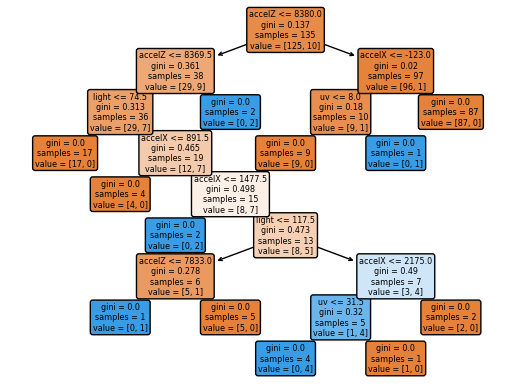

In [4]:
dTree = DecisionTreeClassifier(random_state = 512)

dTree.fit(x_train, y_train)

test_score = dTree.score(x_test, y_test)
train_score = dTree.score(x_train, y_train)
# print(f"A Decision Tree classifier running on the breast cancer dataset from sklearn gives a probility of{test_score * 100: .3f}% on the training data and a probability of{train_score * 100: .3f}%.")

test_predictions = dTree.predict(x_test)
train_predictions = dTree.predict(x_train)

name = "Decision Tree"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)


# plt.figure(figsize=(15, 7.5))
plot_tree(dTree, filled=True, rounded = True, feature_names=X.columns)



XGBoost [0.04651163 0.        ] [0.  0.5] [0.02380952 0.33333333]
XGBoost [0. 0.] [0. 0.] [0. 0.]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

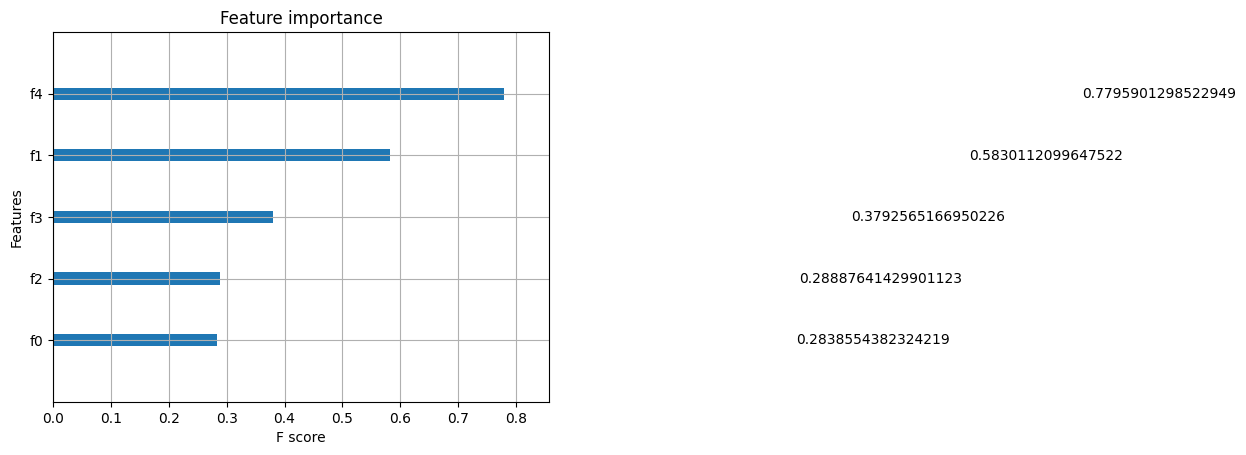

In [5]:
from xgboost import XGBClassifier, plot_importance



xgbClassifier = XGBClassifier(random_state = 42)
fit = xgbClassifier.fit(x_train.to_numpy(), y_train.to_numpy()) # looking up in xgboost docs, it can't be a pandas dataframe, but can be a numpy array.
xgbClassifier.base_score = 0
test_score = xgbClassifier.score(x_test, y_test)
train_score = xgbClassifier.score(x_train, y_train)




test_predictions = xgbClassifier.predict(x_test)
train_predictions = xgbClassifier.predict(x_train)


name = "XGBoost"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

plot_importance(fit,  importance_type = 'gain')



In [6]:
bagging = BaggingClassifier(random_state = 512)
bagging.fit(x_train, y_train)

test_score = bagging.score(x_test, y_test)
train_score = bagging.score(x_train, y_train)




test_predictions = bagging.predict(x_test)
train_predictions = bagging.predict(x_train)

name = "Bagging"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

Bagging [0.06818182 0.        ] [0.   0.75] [0.03529412 0.6       ]
Bagging [0.03100775 0.        ] [0.  0.4] [0.01574803 0.25      ]


In [7]:
adaboost = AdaBoostClassifier(random_state=512)
adaboost.fit(x_train, y_train)

test_score = adaboost.score(x_test, y_test)
train_score = adaboost.score(x_train, y_train)

test_predictions = adaboost.predict(x_test)
train_predictions = adaboost.predict(x_train)

name = "Adaboost"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)


c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost [0.05 0.6 ] [0.07317073 0.5       ] [0.0617284  0.55555556]
Adaboost [0. 0.] [0. 0.] [0. 0.]


In [8]:
random_forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
random_forest.fit(x_train, y_train)

test_score = random_forest.score(x_test, y_test)
train_score = random_forest.score(x_train, y_train)






test_predictions = random_forest.predict(x_test)
train_predictions = random_forest.predict(x_train)

name = "Random Forest"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

Random Forest [0.09090909 1.        ] [0.02439024 1.        ] [0.05882353 1.        ]
Random Forest [0.01574803 0.        ] [0.  0.2] [0.00793651 0.11111111]


In [9]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

test_score = naive_bayes.score(x_test, y_test)
train_score = naive_bayes.score(x_train, y_train)






test_predictions = naive_bayes.predict(x_test)
train_predictions = naive_bayes.predict(x_train)

name = "Naive Bayes"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

Naive Bayes [0.02702703 0.625     ] [0.12195122 0.25      ] [0.07692308 0.5       ]
Naive Bayes [0.04424779 0.77272727] [0.136 0.5  ] [0.09243697 0.6875    ]


# Benchmarks
Comparing tables that compare the Accuracy, Precision and Recall of the different models.

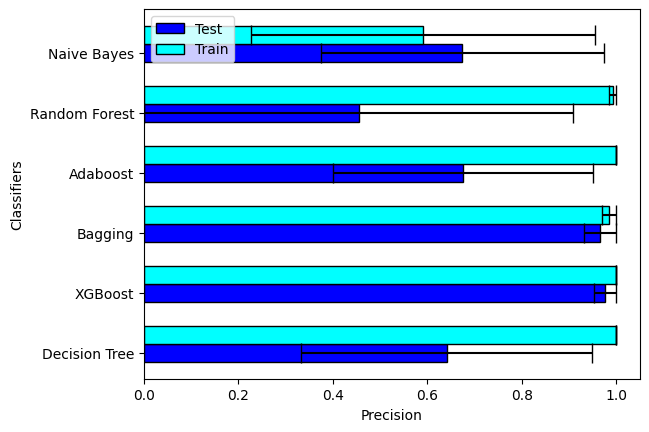

{'Test': {'Decision Tree': array([0.94871795, 0.33333333]), 'XGBoost': array([0.95348837, 1.        ]), 'Bagging': array([0.93181818, 1.        ]), 'Adaboost': array([0.95, 0.4 ]), 'Random Forest': array([0.90909091, 0.        ]), 'Naive Bayes': array([0.97297297, 0.375     ])}, 'Train': {'Decision Tree': array([1., 1.]), 'XGBoost': array([1., 1.]), 'Bagging': array([0.96899225, 1.        ]), 'Adaboost': array([1., 1.]), 'Random Forest': array([0.98425197, 1.        ]), 'Naive Bayes': array([0.95575221, 0.22727273])}}


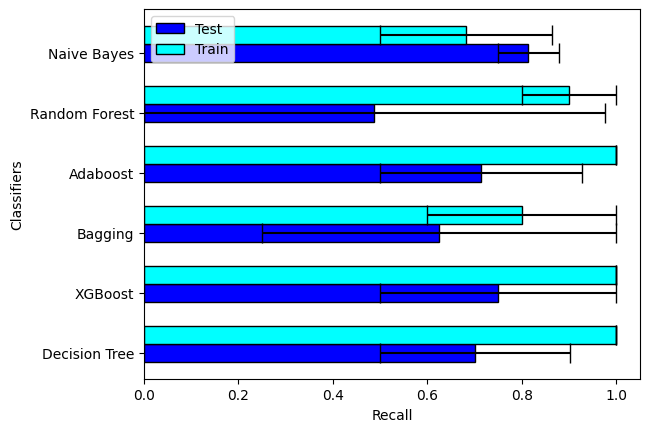

{'Test': {'Decision Tree': array([0.90243902, 0.5       ]), 'XGBoost': array([1. , 0.5]), 'Bagging': array([1.  , 0.25]), 'Adaboost': array([0.92682927, 0.5       ]), 'Random Forest': array([0.97560976, 0.        ]), 'Naive Bayes': array([0.87804878, 0.75      ])}, 'Train': {'Decision Tree': array([1., 1.]), 'XGBoost': array([1., 1.]), 'Bagging': array([1. , 0.6]), 'Adaboost': array([1., 1.]), 'Random Forest': array([1. , 0.8]), 'Naive Bayes': array([0.864, 0.5  ])}}


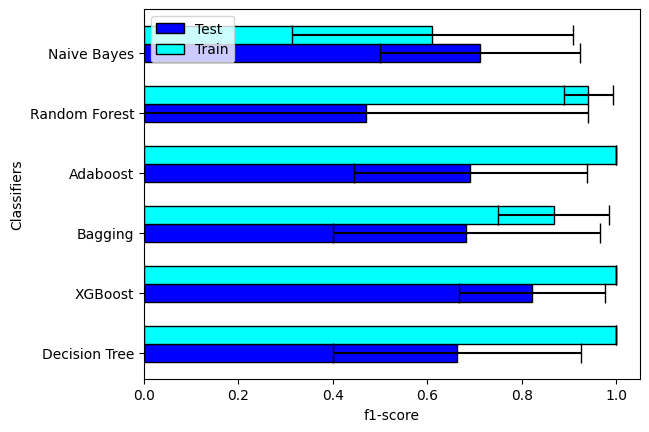

{'Test': {'Decision Tree': array([0.925, 0.4  ]), 'XGBoost': array([0.97619048, 0.66666667]), 'Bagging': array([0.96470588, 0.4       ]), 'Adaboost': array([0.9382716 , 0.44444444]), 'Random Forest': array([0.94117647, 0.        ]), 'Naive Bayes': array([0.92307692, 0.5       ])}, 'Train': {'Decision Tree': array([1., 1.]), 'XGBoost': array([1., 1.]), 'Bagging': array([0.98425197, 0.75      ]), 'Adaboost': array([1., 1.]), 'Random Forest': array([0.99206349, 0.88888889]), 'Naive Bayes': array([0.90756303, 0.3125    ])}}


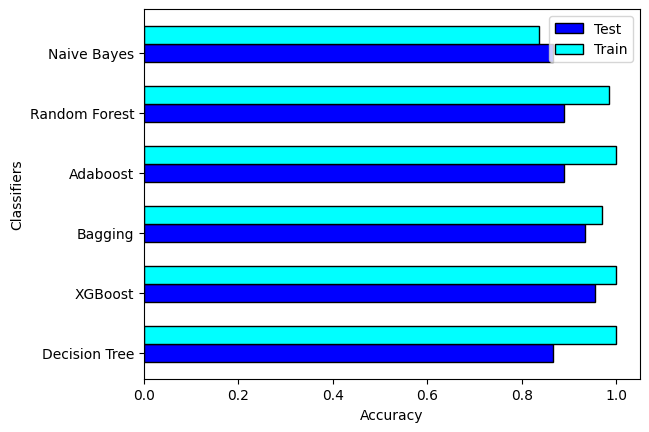

{'Test': {'Decision Tree': 0.8666666666666667, 'XGBoost': 0.9555555555555556, 'Bagging': 0.9333333333333333, 'Adaboost': 0.8888888888888888, 'Random Forest': 0.8888888888888888, 'Naive Bayes': 0.8666666666666667}, 'Train': {'Decision Tree': 1.0, 'XGBoost': 1.0, 'Bagging': 0.9703703703703703, 'Adaboost': 1.0, 'Random Forest': 0.9851851851851852, 'Naive Bayes': 0.837037037037037}}


In [10]:
def draw_table_w_conf_int(data, statistic):
    bar_width = 0.3

    classifiers = list(data["Test"].keys())
    test_results = list(data["Test"].values())
    train_results = list(data["Train"].values())
    test_exp = []
    test_err = []
    for test_result in test_results:
        test_exp.append(test_result[0] + (test_result[1] - test_result[0]) / 2)
        test_err.append(abs(test_result[1] - test_result[0]) / 2)

    train_exp = []
    train_err = []
    for train_result in train_results:
        train_exp.append(train_result[0] + (train_result[1] - train_result[0]) / 2)
        train_err.append(abs(train_result[1] - train_result[0]) / 2)
    
    r1 = np.arange(len(test_exp))
    r2 = [x + bar_width for x in r1]

    plt.barh(r1, test_exp, height = bar_width, color = 'blue', edgecolor = 'black', xerr=test_err, capsize=7, label="Test")

    plt.barh(r2, train_exp, height = bar_width, color = 'cyan', edgecolor = 'black', xerr=train_err, capsize=7, label='Train')

    plt.yticks([r for r in range(len(test_exp))], classifiers)

    plt.xlabel(f"{statistic}")
    plt.ylabel('Classifiers')

    plt.legend()
    plt.show()


def draw_table(data, statistic):
    bar_width = 0.3

    classifiers = list(data["Test"].keys())
    test_results = list(data["Test"].values())
    train_results = list(data["Train"].values())

    
    r1 = np.arange(len(classifiers))
    r2 = [x + bar_width for x in r1]

    plt.barh(r1, test_results, height = bar_width, color = 'blue', edgecolor = 'black', capsize=7, label="Test")

    plt.barh(r2, train_results, height = bar_width, color = 'cyan', edgecolor = 'black', capsize=7, label='Train')

    plt.yticks([r for r in range(len(classifiers))], classifiers)

    plt.xlabel(f"{statistic}")
    plt.ylabel('Classifiers')

    plt.legend()
    plt.show()

    """
    classifiers = list(data.keys())
    results = list(data.values())
    print(classifiers, results)

    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.barh(classifiers, results, color ="navy")
    
    
    plt.ylabel("Classifier")
    plt.title(f"Comparing 1 - (The {statistic}) With Each Classifier For {datatype} Data")
    plt.show()"""

draw_table_w_conf_int(precisions, "Precision")
print(precisions)

draw_table_w_conf_int(recall, "Recall")
print(recall)

draw_table_w_conf_int(f_score, "f1-score")
print(f_score)

draw_table(accuracies, "Accuracy")
print(accuracies)





    

## ROC Curve

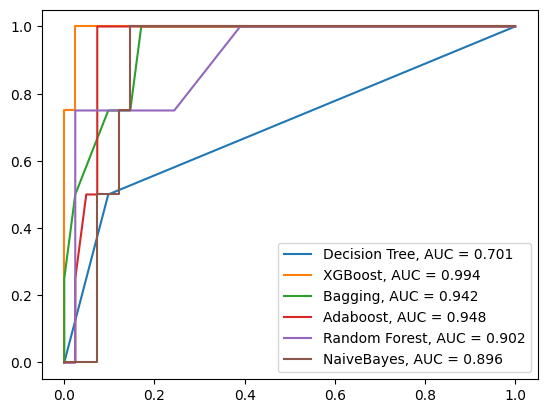

In [11]:
plt.figure(0).clf()

classifiers = {
    "Decision Tree": dTree,
    "XGBoost": xgbClassifier,
    "Bagging": bagging,
    "Adaboost": adaboost,
    "Random Forest": random_forest,
    "NaiveBayes": naive_bayes
}

for name, classifier in classifiers.items():
    y_pred_probs = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label = f"{name}, AUC = {auc:.3f}")


plt.legend()

In [12]:
# m2cgen

dart_model = []

# naive_bayes_dart = m2c.export_to_dart(naive_bayes)
# random_forest_dart = m2c.export_to_dart(random_forest)
# xgbClassifier_dart = m2c.export_to_dart(xgbClassifier)
# adaboost_dart = m2c.export_to_dart(adaboost)

# with open('random_forest.dart', 'w') as f:
#     code = m2c.export_to_dart(random_forest)
#     f.write(code)
# with open('xgboost.dart', 'w') as f:
#     code = m2c.export_to_dart(xgbClassifier)
#     f.write(code)
# with open('xgboost.py', 'w') as f:
#     code = m2c.export_to_python(xgbClassifier)
#     f.write(code)
# with open('decision_tree.dart', 'w') as f:
#     code = m2c.export_to_dart(dTree)
#     f.write(code)
# import pickle



# with open('xgboost.pkl', 'wb') as file:

#     pickle.dump(xgbClassifier, file )



joblib.dump(xgbClassifier, "xgboost_model.pkl")

['xgboost_model.pkl']

In [13]:
# joblib.dump(x_train.columns, 'column_order.txt')